# Auswertung Versuch 233: Fourier-Optik

## Teil 1: Quantitative Beobachtungen am Einzelspalt

### Bestimmung der Spaltbreite

In [40]:
#Benötigte Pakete
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['errorbar.capsize']=2
from scipy.integrate import quad
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema



In [2]:
#Bestimmung der Abstände der Minima 
min_order=np.array([1,2,3,4,5])
min_pos_left=np.array([932.69,838.65,749.67,659.80,575.26]) #von der ersten bis zur fünften Ordnung 
min_pos_right=np.array([1109.38,1187.47,1275.56,1361.87,1447.30])

delta_min=np.abs(min_pos_left-min_pos_right)
delta_min_err=np.sqrt(2)*3*np.ones(5) #Fehler jeweils 3pxl

In [3]:
#Eichung der Pixelskala zum Umrechnen des Spaltabstands in Längeneinheiten 
dpx=np.array([387.04,546.71,723.74,897.30])
dpx_err=3*np.ones(4)
slit_aperture=np.array([0.88,1.26,1.70,2.12]) #direkt die Messwerte verdoppelt
slit_aperture_err=0.02*np.ones(4)

gauge=slit_aperture/dpx  #Faktor zur Umrechnung von Pixel in mm

gauge_mean=np.mean(gauge)
gauge_syst=np.mean(gauge*np.sqrt((slit_aperture_err/slit_aperture)**2+(dpx_err/dpx)**2))
gauge_stat=np.std(gauge)/np.sqrt(4)


print('Der Umrechnungsfaktor u wurde berechnet zu: ')
print(str(gauge_mean)+' +/- '+str(gauge_syst)+' +/- '+str(gauge_stat))

Der Umrechnungsfaktor u wurde berechnet zu: 
0.00232247886987 +/- 3.65626005345e-05 +/- 1.76965091658e-05


Die Steigung der Fit-Gerade beträgt:
a = 174.395001004 +/- 0.69221374115 pxl
Mit y-Achsenabschnitt:
c = 1.91699631127 +/- 2.29581438229 pxl


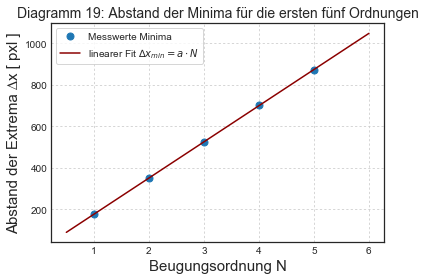

In [4]:
#Definition der linearen Fit-Funktion
def linear_fit(x,a,b):
    return a*x+b
popt,pcov=curve_fit(linear_fit,min_order,delta_min,sigma=delta_min_err)

x_fit=np.linspace(0.5,6,100) #Länge der Fit-Gerade


#Plot der Minima-Abstände mit lin.Fit
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')

#Fehlerbalken nicht notwendig, da sie sowieso nicht sichtbar wären.

#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 19: Abstand der Minima für die ersten fünf Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)


#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm19.pdf',format='PDF')

a=popt[0]
a_err=pcov[0,0]**0.5

print('Die Steigung der Fit-Gerade beträgt:')
print( 'a = ' + str(a) + ' +/- ' + str(a_err) + ' pxl')
print('Mit y-Achsenabschnitt:')
print('c = '+ str(popt[1])+ ' +/- ' + str(pcov[1,1]**0.5) + ' pxl')

In [5]:
#Umrechnung der Spaltbreite in mm
a_prime= gauge_mean*a

a_prime_syst=np.sqrt((gauge_syst)**2+(a_err*gauge_mean)**2)
a_prime_stat=np.sqrt((gauge_stat)**2+(a_err*gauge_mean)**2)

a_prime_mean=np.mean(a_prime)
a_prime_mean_syst=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_syst)**2)
a_prime_mean_stat=np.sqrt((gauge_mean*pcov[0,0]**0.5)**2+(popt[0]*gauge_stat)**2)

print('Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:')
print( 'a_prime = ' + str(a_prime_mean) + ' +/- ' + str(a_prime_mean_syst) + ' +/a- ' + str(a_prime_mean_stat)+ ' mm/order')



Mit der Eichung der Skala erhalten wir die Steigung a in mm/order:
a_prime = 0.405028704844 +/- 0.00657587934816 +/a- 0.00347980863484 mm/order


In [6]:
#Bestimmung der Spaltbreite aus der Steigung des Fits (Herleitung in Auswertung)
wavelength=635e-9
f1= 80e-3 

b=2*wavelength*f1/(a_prime_mean*1e-3)
b_syst=b*(a_prime_mean_syst/a_prime_mean)
b_stat=b*(a_prime_mean_stat/a_prime_mean)

print('Aus der Steigung von Diagramm 19 erhalten wir:')
print('b = '+str(b)+ ' +/- '+str(b_syst)+ ' +/- '+str(b_stat)+ ' m')

Aus der Steigung von Diagramm 19 erhalten wir:
b = 0.0002508464185 +/- 4.07263920618e-06 +/- 2.15514980216e-06 m


Die Differenz der jeweiligen Maxima beträgt:
∆max =      [ 247.58  428.9   610.42  775.05  957.46]
mit Fehler: [ 4.24264069  4.24264069  4.24264069  4.24264069  4.24264069]

Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:
N =         [ 1.40865852  2.44836722  3.48922274  4.43322916  5.47918804]
mit Fehler: [ 0.02822066  0.02931868  0.03093465  0.03278384  0.035187  ]

Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:
∆N =        [ 0.09134148  0.05163278  0.01077726  0.06677084  0.02081196]
mit Fehler: [ 0.02822066  0.02931868  0.03093465  0.03278384  0.035187  ]


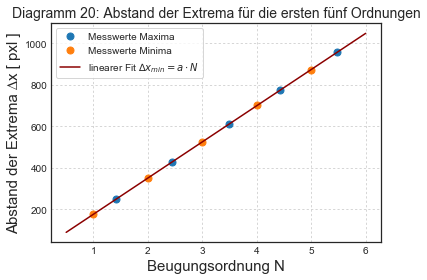

In [47]:
#Bestimmung der Abstände der Maxima
max_pos_left=np.array([889.78,799.50,709.63,625.09,532.55])
max_pos_right=np.array([1137.36,1228.40,1320.05,1400.14,1490.01])

#Abstände der jeweiligen Beugungsordnungen
delta_max=np.abs(max_pos_left-max_pos_right)
delta_max_err=np.sqrt(2)*3*np.ones(5)

print('Die Differenz der jeweiligen Maxima beträgt:')
print('∆max =      '+str(delta_max))
print('mit Fehler: '+str(delta_max_err))
print()

#Position der Maxima mit Hilfe von Diagramm 19
n_max_calc=(delta_max-popt[1])/popt[0]
n_max_calc_err=np.sqrt((delta_max_err/popt[0])**2+(pcov[1,1]**0.5/popt[0])**2+((delta_max-popt[1])*pcov[0,0]**0.5/popt[0]**2)**2)
n_max_theory=np.arange(1.5,6.5,1)
#Differenz Messwert-Theorie
diff_n_max=np.abs(n_max_theory-n_max_calc)

print('Wir erhalten die den Maxima zugeordneten Beugungsordnungen aus dem Fit:')
print('N =         ' + str(n_max_calc))
print ('mit Fehler: ' + str(n_max_calc_err))
print()

#Plot der Maxima-Abstände 
plt.plot(n_max_calc,delta_max,linestyle='',marker='o',markersize=7,label='Messwerte Maxima')
plt.plot(min_order,delta_min,linestyle='',marker='o',markersize=7,label='Messwerte Minima')
plt.plot(x_fit,linear_fit(x_fit,*popt),color='darkred',label='linearer Fit $ ∆x_{min} = a \cdot N $')


#Plot-Parameter
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('Abstand der Extrema ∆x [ pxl ]',size=15)
plt.title('Diagramm 20: Abstand der Extrema für die ersten fünf Ordnungen',size=14)
plt.grid(ls='dotted')
plt.legend(frameon=True)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm20.pdf',format='PDF')

print('Der Vergleich mit den theoretischen Werten (1.5,2.5,...) liefert:')
print('∆N =        ' + str(diff_n_max))
print ('mit Fehler: ' + str(n_max_calc_err))


### Vergleich der relativen Intensitäten aus den beide Messreihen

In [9]:
#zunächst einmal muss das Verhältnis aus der ersten Messung bestimmt werden,da bei der zweiten das 0. Max. übersteuert
#für den Fehler der counts gilt allgemein:

intensity_err=10

#erste Messung
max0_intesity1=3779.50

max1_intensity_left1=448.33 
ug_left1=259.10

max1_intensity_right1=430.48
ug_right1=265.22

#Abziehen des Untergrunds durch Mittlung des linken und des rechten Untergrundes
max0_1_corr=(max0_intesity1-ug_left1+ug_right1/2)
max0_1_corr_err=max0_1_corr*np.sqrt((intensity_err/max0_intesity1)**2+(intensity_err/ug_left1)**2+(intensity_err/ug_right1)**2)

#Abziehen des linken Untergrunds
max1_left1_corr=max1_intensity_left1-ug_left1
max1_left1_corr_err=np.sqrt(2)*intensity_err

#Abziehen des rechten Untergrunds
max1_right1_corr=max1_intensity_right1-ug_right1
max1_right1_corr_err=np.sqrt(2)*intensity_err

#Verhältnis vom nullten zum ersten Maximum
prob_max1_max0_left =max1_left1_corr/max0_1_corr
prob_left_err =prob_max1_max0_left*np.sqrt((max1_left1_corr_err/max1_left1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

prob_max1_max0_right = max1_right1_corr/max0_1_corr
prob_right_err= prob_max1_max0_right*np.sqrt((max1_right1_corr_err/max1_right1_corr)**2+(max0_1_corr_err/max0_1_corr)**2)

print('Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_left) + ' +/- ' + str(prob_left_err))
print()
print('Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:')
print(str(prob_max1_max0_right) + ' +/- ' + str(prob_right_err))
print()



Das Verhältnis vom 1.Nebenmaximum links zum Hauptmaximum beträgt:
0.05180111743466346 +/- 0.00477682795382

Das Verhältnis vom 1.Nebenmaximum rechts zum Hauptmaximum beträgt:
0.04523940531233147 +/- 0.00457819879624



In [10]:
#Ab hier werden die Messdaten der zweiten Messreihe verwendet
max_intensity_left2=np.array([3609.03,1599.67,1105.51,781.61,623.61])
ug_left2=397.31*np.ones(5)

max_intensity_left2_corr=max_intensity_left2-ug_left2
max_intensity_left2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

max_intensity_right2=np.array([3706.94,1696.92,958.20,745.08,620.04])
ug_right2=330.56*np.ones(5)

max_intensity_right2_corr=max_intensity_right2-ug_right2
max_intensity_right2_corr_err=np.sqrt(2)*intensity_err*np.ones(5)

#Jetzt können wir anhand des Ergebnisses die Werte für die zweite Messreihe durch Umrechnung bestimmen
max0_intesity2_left=(1/prob_max1_max0_left)*max_intensity_left2_corr[0]
max0_intesity2_left_err=max0_intesity2_left*np.sqrt((prob_left_err/prob_max1_max0_left)**2+(intensity_err/max_intensity_left2_corr[0])**2)

max0_intesity2_right=(1/prob_max1_max0_right)*max_intensity_right2_corr[0]
max0_intesity2_right_err=max0_intesity2_right*np.sqrt((prob_right_err/prob_max1_max0_right)**2+(intensity_err/max_intensity_right2_corr[0])**2)

max0_intensity2_tot=(max0_intesity2_left+max0_intesity2_right)/2
max0_intensity2_tot_err=max0_intensity2_tot*np.sqrt((max0_intesity2_left_err/max0_intesity2_left)**2+(max0_intesity2_left_err/max0_intesity2_right)**2)

print('Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: ')
print('I_max0 = ' + str(max0_intensity2_tot) + ' +/- ' + str(max0_intensity2_tot_err))
print()

#Jetzt können wir das Verhältnis zum nullten Maximum trotz der Übersteuerung ausrechnen!
max0_2=max0_intensity2_tot*np.ones(5)

prob_max_max0_left=max_intensity_left2_corr/max0_intensity2_tot
prob_max_max0_left_err=prob_max_max0_left*np.sqrt((max_intensity_left2_corr_err/max_intensity_left2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

prob_max_max0_right=max_intensity_right2_corr/max0_intensity2_tot
prob_max_max0_right_err=prob_max_max0_right*np.sqrt((max_intensity_right2_corr_err/max_intensity_right2_corr)**2+(max0_intensity2_tot_err/max0_intensity2_tot)**2)

print('Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:')
print('linke Maxima: ' + str(prob_max_max0_left))
print('Fehler links: ' + str(prob_max_max0_left_err))
print()
print('rechte Maxima: ' + str(prob_max_max0_right))
print('Fehler rechts: ' + str(prob_max_max0_right_err))



Nach Umrechnung durch das Verhältnis aus der ersten Messreihe hätte das nullte Max. die Intensität: 
I_max0 = 68317.2930888 +/- 8194.79414345

Im Verhältnis zum berechnenten Maximum ergeben sich damit die folgenden Verhältnisse:
linke Maxima: [ 0.04701182  0.01759964  0.01036634  0.00562522  0.00331248]
Fehler links: [ 0.00564296  0.00212124  0.00126058  0.0007058   0.00044803]

rechte Maxima: [ 0.04942204  0.02000021  0.00918713  0.00606757  0.00423729]
Fehler rechts: [ 0.00593188  0.00240798  0.00112129  0.00075668  0.00054881]


### Berechung der theoretischen Intensitätsverhältnisse

Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:
[ 0.04719045  0.01648003  0.00834029  0.00502872  0.00336073]


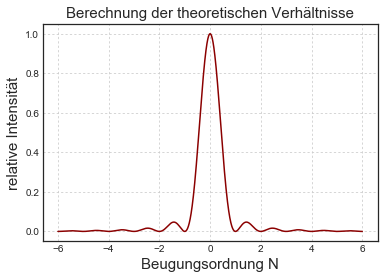

In [11]:
def beugung_spalt(x):
    return np.sinc(x)**2
a=5
#kleinere Schrittweite für präzisere Berechnung der Maxima, ungerade Anzahl damit nur einmal das nullte berechnet wird
x=np.linspace(-(a+1),a+1,200001)

#Berechnung der relativen Maxima
slit_theory=argrelextrema(beugung_spalt(x), np.greater_equal, order = 1) 
max_theory=np.array(beugung_spalt(x[slit_theory]))
max_theory_sliced=max_theory[4::-1]

print('Die theoretischen Werte für die Verhältnisse Nebenmaximum/Hauptmaximum ergeben sich zu:')
print(max_theory_sliced)

plt.plot(x,beugung_spalt(x),color='darkred')
plt.title('Berechnung der theoretischen Verhältnisse',size=15)
plt.xlabel('Beugungsordnung N',size=15)
plt.ylabel('relative Intensität',size=15)
plt.grid(ls='dotted')


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [12]:
#Wir gehen bei den Theorie-Werten von einer fehlerfreien Bestimmung aus

#linke Seite
diff_max_theory_left=np.abs(max_theory_sliced-prob_max_max0_left)

#rechte Seite 
diff_max_theory_right=np.abs(max_theory_sliced-prob_max_max0_right)

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_theory_left)
print('mit Fehler:')
print(prob_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_theory_right)
print('mit Fehler:')
print(prob_max_max0_right_err)
print()
print('Die Werte liegen somit alle mindestens im 3-Sigma Intervall.')

Der Vergleich liefert für die linke Seite:
[  1.78633277e-04   1.11961750e-03   2.02604312e-03   5.96504187e-04
   4.82449927e-05]
mit Fehler:
[ 0.00564296  0.00212124  0.00126058  0.0007058   0.00044803]

Der Vergleich liefert für die rechte Seite:
[ 0.00223159  0.00352018  0.00084684  0.00103885  0.00087656]
mit Fehler:
[ 0.00593188  0.00240798  0.00112129  0.00075668  0.00054881]

Die Werte liegen somit alle mindestens im 3-Sigma Intervall.


## Teil 2: Beugungsstruktur des Doppelspaltes

In [13]:
#Berechnung des Verhältnisses von Spaltabstand & Spaltbreite aus Teilaufgabe 4

#Positionen der Ränder
pos_err= 3 #pxl
#links
x1_1= 898.88
x1_2= 1041.85
#rechts
x2_1= 1233.41
x2_2= 1374.70

width_left=np.abs(x1_1-x1_2)
width_right=np.abs(x2_1-x2_2)

width_err=np.sqrt(2)*pos_err

width_mean=(width_left+width_right)/2
width_mean_err=width_mean*np.sqrt((width_err/width_left)**2+(width_err/width_right)**2)


print('Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):')
print('d = '+str(width_mean)+' +/- '+str(width_mean_err)+' pxl')
print()

#Berechnung des Spaltabstandes aus Mittelpunkten der Spalte

mid_left =(x1_1+x1_2)/2
mid_left_err = mid_left*np.sqrt((pos_err/x1_1)**2+(pos_err/x1_2)**2)

mid_right =(x2_1+x2_2)/2
mid_right_err = mid_right*np.sqrt((pos_err/x2_1)**2+(pos_err/x2_2)**2)

diff_mid = np.abs(mid_right-mid_left)
diff_mid_err = np.sqrt(mid_left_err**2+mid_right_err**2)

print('Der Spaltabstand g des Doppelspalts beträgt: ')
print('g = '+str(diff_mid)+' +/- '+ str(diff_mid_err)+ ' pxl')
print()

#Verhältnis des Spaltabstands zur Spaltbreite

prob_gd = diff_mid/width_mean
prob_gd_err = prob_gd*np.sqrt((diff_mid_err/diff_mid)**2+(width_mean_err/width_mean)**2)

print('Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:')
print('v = '+str(prob_gd)+' +/- '+str(prob_gd_err))


Die Spaltbreite d der beiden einzelnen Spalte beträgt(gemittelt):
d = 142.13 +/- 6.00031437172 pxl

Der Spaltabstand g des Doppelspalts beträgt: 
g = 333.69 +/- 6.03779625815 pxl

Demnach ergibt sich für das Verhältnis v aus Spaltabstand und Spaltbreite:
v = 2.34778020122 +/- 0.107836388446


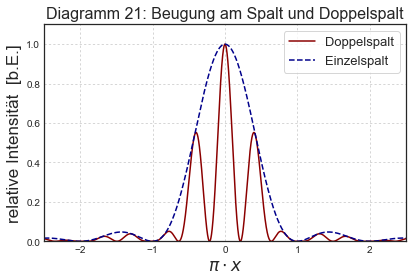

In [14]:
#Bestimmung der Beugungsfunktion des Doppelspalts (Theorie)
v=prob_gd
#Randwerte des 1-Sigma_intervalls
v2=prob_gd-prob_gd_err
v3=prob_gd+prob_gd_err

def beugung_doppelspalt(x):
    return np.sinc(x)**2*np.cos(np.pi*v*x)**2

#zum Vergleich soll noch das Bild des zugehörigen Einzelspalt ins Diagramm geplottet werden.

plt.plot(x,beugung_doppelspalt(x),color='darkred',label='Doppelspalt')
plt.plot(x,beugung_spalt(x),color='darkblue',label='Einzelspalt',linestyle='--')
plt.title('Diagramm 21: Beugung am Spalt und Doppelspalt',size=16)
plt.xlabel('$\pi \cdot x$',size=17)
plt.ylabel('relative Intensität  [b.E.]',size=17)
plt.grid(ls='dotted')
plt.ylim(0,1.1)
plt.xlim(-2.5,2.5)
plt.legend(frameon=True,fontsize=13)

#Abspeichern des Diagramms
plt.tight_layout()
plt.savefig('Diagramme/V233Diagramm21.pdf',format='PDF')




### Vergleich der Theorie-Kurve mit unseren Messwerten

In [15]:
#Wir berechnen auch hier die Verhältnisse der Intensitätem der jeweiligen Maxima mit dem Hauptmaximum

#Messwerte 
max2_0= 3886.76
#Fehler=intensity_err=10 counts
max2_left=np.array([2407.25,527.99,380.09,398.50]) #vom 1. bis zum 4. Nebenmaximum
ug_left2=252.39*np.ones(4)

corr_err=np.sqrt(2)*intensity_err #Fehler der Differenz

max2_left_corr=max2_left-ug_left2


max2_right=np.array([2475.86,563.42,373.32,411.57]) #vom 1. bis zum 4. Nebenmaximum
ug_right2=266.76*np.ones(4)

max2_right_corr=max2_right-ug_right2

prob2_max_max0_left=max2_left_corr/max2_0
prob2_max_max0_left_err=prob2_max_max0_left*np.sqrt((corr_err/max2_left_corr)**2+(intensity_err/max2_0)**2)

prob2_max_max0_right=max2_right_corr/max2_0
prob2_max_max0_right_err=prob2_max_max0_right*np.sqrt((corr_err/max2_right_corr)**2+(intensity_err/max2_0)**2)

print('Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:')
print('linke Seite: '+str(prob2_max_max0_left))
print('mit Fehler:  '+str(prob2_max_max0_left_err))
print()
print('rechte Seite: '+str(prob2_max_max0_right))
print('mit Fehler:   '+str(prob2_max_max0_right_err))
print()

#Theorie-Kurve

doubleslit_theory = argrelextrema(beugung_doppelspalt(x), np.greater_equal, order = 2000) 
max2_theory=np.array(beugung_doppelspalt(x[doubleslit_theory]))
max2_theory_sliced=max2_theory[14:10:-1]

print('Die Theorie-Werte sind: '+str(max2_theory_sliced))



Der Vergleich der Intensitäten unserer Messungen liefert die nochfolgenden Verhältnisse:
linke Seite: [ 0.55441036  0.07090739  0.03285513  0.03759172]
mit Fehler:  [ 0.00390815  0.00364311  0.00363952  0.00363983]

rechte Seite: [ 0.56836543  0.07632578  0.02741615  0.03725725]
mit Fehler:   [ 0.00392139  0.00364384  0.00363922  0.0036398 ]

Die Theorie-Werte sind: [ 0.55210621  0.05066628  0.03824465  0.02540414]


### Vergleich der Theorie-Werte mit unseren Messergebnissen

In [16]:
#Wir gehen bei den Theorie-Werten erneut von einer fehlerfreien Bestimmung aus.

#linke Seite
diff2_max_theory_left=np.abs(prob2_max_max0_left-max2_theory_sliced)

#rechte Seite 
diff2_max_theory_right=np.abs(prob2_max_max0_right-max2_theory_sliced)

print('Der Vergleich liefert für die linke Seite:')
print(diff2_max_theory_left)
print('mit Fehler:')
print(prob2_max_max0_left_err)
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff2_max_theory_right)
print('mit Fehler:')
print(prob2_max_max0_right_err)
print()
print('Damit sind einige Wertepaare signifikant verschieden!')

Der Vergleich liefert für die linke Seite:
[ 0.00230414  0.02024111  0.00538953  0.01218758]
mit Fehler:
[ 0.00390815  0.00364311  0.00363952  0.00363983]

Der Vergleich liefert für die rechte Seite:
[ 0.01625921  0.02565951  0.0108285   0.01185311]
mit Fehler:
[ 0.00392139  0.00364384  0.00363922  0.0036398 ]

Damit sind einige Wertepaare signifikant verschieden!


### Vergleich der relativen Intensitäten der Nebenmaxima zwischen dem ersten Minimum der Spaltfunktion

In [17]:
#Das betrifft jeweils die ersten beiden Nebenmaxima. Die Daten werden aus dem vorherigen Code übernommen.

#Differenzbildung
diff_max_under_single_left=np.abs(max2_theory[14:12:-1]-prob2_max_max0_left[0:2])
diff_max_under_single_right=np.abs(max2_theory[14:12:-1]-prob2_max_max0_right[0:2])

print('Der Vergleich liefert für die linke Seite:')
print(diff_max_under_single_left)
print('mit Fehler:')
print(prob2_max_max0_left_err[0:2])
print()
print('Der Vergleich liefert für die rechte Seite:')
print(diff_max_under_single_right)
print('mit Fehler:')
print(prob2_max_max0_right_err[0:2])
print()
print('Damit sind 3 von 4 Wertepaaren signifikant verschieden!')


Der Vergleich liefert für die linke Seite:
[ 0.00230414  0.02024111]
mit Fehler:
[ 0.00390815  0.00364311]

Der Vergleich liefert für die rechte Seite:
[ 0.01625921  0.02565951]
mit Fehler:
[ 0.00392139  0.00364384]

Damit sind 3 von 4 Wertepaaren signifikant verschieden!


## Teil 3: Das Objektbild als Fouriersynthese

In [18]:
# Integrand zu Formel 57, Einzelspalt
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Integrand zu 57, Doppelspalt
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2)*np.sin(k*d/2)/(k*d/2)*np.cos(yi*k)

# Funktion zur berechnung und zum plot des resultierenden Objektbildes

d = b
def picture(
           function, # Integrand
           b,        # Integrationsbereich bezüglich der Nullstellen
           dateiname,
           speichername):
    
    # Definieren der Funktionsvariable
    global n
    global g
    g = 2*d
    n = b
    
    if function == spalt:
        y = np.linspace(-d, d, 301)
    else:
        y = np.linspace(-g, g, 501)
    
    # Berechnung des Objektbiles
    f_mod = []
    for i in range(len(y)): # numerische Inegration
        global yi 
        yi = y[i]
        result, error = quad(function, 0, 2*np.pi*n/d)
        f_mod.append(result**2)
    f_mod = f_mod/np.max(f_mod)
    
    # Lage der Maxima
    max1 = argrelextrema(f_mod, np.greater_equal, order = 1)
    f_max1 = f_mod[max1]
    y_max1 = y[max1]
    max2 = (f_max1 > 0.05)
    f_max = f_max1[max2]
    y_max = y_max1[max2]
    
    # Lage der Maxima
    min1 = argrelextrema(f_mod, np.less_equal, order = 1)
    f_min1 = f_mod[min1]
    y_min1 = y[min1]
    min2 = (f_min1 > 0.05)
    f_min = f_min1[min2]
    y_min = y_min1[min2]
    
    # Plot
    plt.figure(dateiname)
    plt.plot(y, f_mod, color = 'darkgreen', linewidth = 0.8)
    plt.plot(y_max, f_max, linestyle ='', marker = 'x', color = 'darkblue', label = 'Maxima')
    plt.plot(y_min, f_min, linestyle ='', marker = 'x', color = 'darkred', label = 'Minima')
    plt.xlabel('y / d',size=15)
    plt.ylabel('rel. Intensität [b. E.]',size=15)
    plt.title('Diagramm %s' %dateiname,size=13)
    plt.ylim((0, 1.1))
    plt.savefig('Diagramme/%s.pdf' %speichername)
    
    # Ausgabe der Lage der Maxima und Minima
    return y_max, f_max, y_min, f_min
    

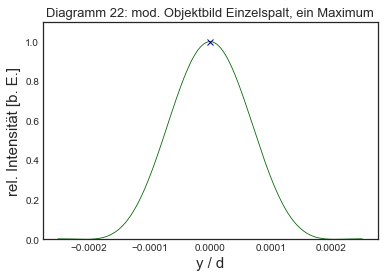

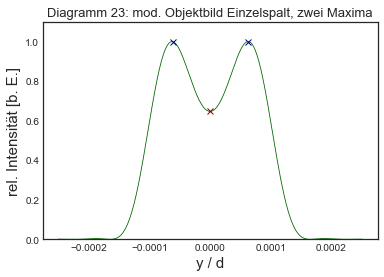

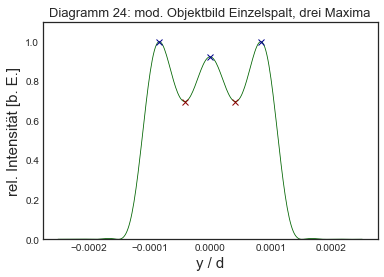

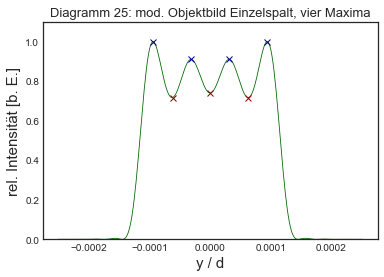

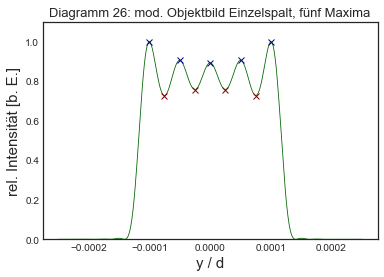

In [19]:
#Plotten der Einzelspaltbilder
maxPos_spalt1, maxInt_spalt1, minPos_spalt1, minInt_spalt1 = picture(spalt, 1, '22: mod. Objektbild Einzelspalt, ein Maximum','V233Diagramm22')
maxPos_spalt2, maxInt_spalt2, minPos_spalt2, minInt_spalt2 = picture(spalt, 2, '23: mod. Objektbild Einzelspalt, zwei Maxima','V233Diagramm23')
maxPos_spalt3, maxInt_spalt3, minPos_spalt3, minInt_spalt3 = picture(spalt, 3, '24: mod. Objektbild Einzelspalt, drei Maxima','V233Diagramm24')
maxPos_spalt4, maxInt_spalt4, minPos_spalt4, minInt_spalt4 = picture(spalt, 4, '25: mod. Objektbild Einzelspalt, vier Maxima','V233Diagramm25')
maxPos_spalt5, maxInt_spalt5, minPos_spalt5, minInt_spalt5 = picture(spalt, 5, '26: mod. Objektbild Einzelspalt, fünf Maxima','V233Diagramm26')

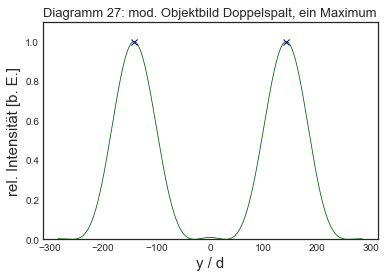

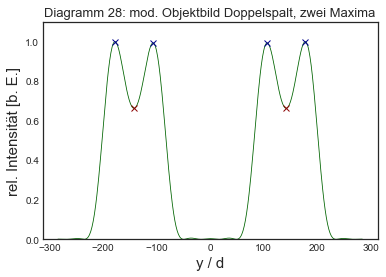

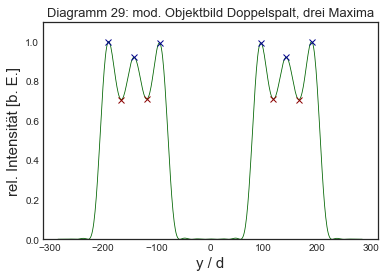

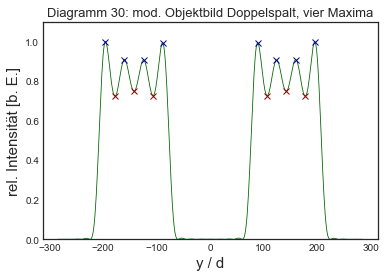

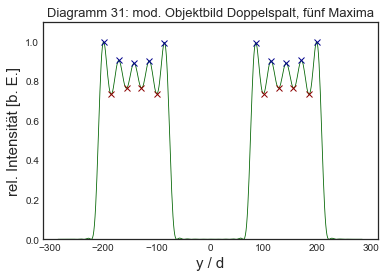

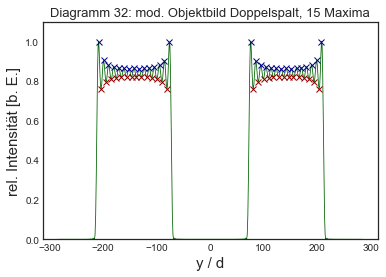

In [20]:
#Doppelspalt
d=width_mean
g=diff_mid

#Plotten der Doppelspaltbilder mit zuver berechnetem d und g
maxPos_dspalt1, maxInt_dspalt1, minPos_dspalt1, minInt_dspalt1 = picture(doppelspalt, 1, '27: mod. Objektbild Doppelspalt, ein Maximum','V233Diagramm27')
maxPos_dspalt2, maxInt_dspalt2, minPos_dspalt2, minInt_dspalt2 = picture(doppelspalt, 2, '28: mod. Objektbild Doppelspalt, zwei Maxima','V233Diagramm28')
maxPos_dspalt3, maxInt_dspalt3, minPos_dspalt3, minInt_dspalt3 = picture(doppelspalt, 3, '29: mod. Objektbild Doppelspalt, drei Maxima','V233Diagramm29')
maxPos_dspalt4, maxInt_dspalt4, minPos_dspalt4, minInt_dspalt4 = picture(doppelspalt, 4, '30: mod. Objektbild Doppelspalt, vier Maxima','V233Diagramm30')
maxPos_dspalt5, maxInt_dspalt5, minPos_dspalt5, minInt_dspalt5 = picture(doppelspalt, 5, '31: mod. Objektbild Doppelspalt, fünf Maxima','V233Diagramm31')
maxPos_dspalt15, maxInt_dspalt15, minPos_dspalt15, minInt_dspalt15 = picture(doppelspalt, 15, '32: mod. Objektbild Doppelspalt, 15 Maxima','V233Diagramm32')

In [21]:
# Funktion zum Bestimmen der Extrema
def distance(pos):
    Pos = []
    if len(pos) < 2:
        True
    else:
        for i in range(len(pos) - 1):
            Pos.append(pos[i+1] - pos[i])
    return np.round(Pos, 1)

def distance_err(pos_err):
    Pos_err = []
    if len(pos_err) < 2:
        True
    else:
        for i in range(len(pos_err) - 1):
            Pos_err.append(np.sqrt(pos_err[i+1]**2 + pos_err[i]**2))
    return np.round(Pos_err, 1)

In [22]:
# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max = distance(maxPos_spalt1) 
dist_spalt2_max = distance(maxPos_spalt2) 
dist_spalt3_max = distance(maxPos_spalt3) 
dist_spalt1_min = distance(minPos_spalt1) 
dist_spalt2_min = distance(minPos_spalt2) 
dist_spalt3_min = distance(minPos_spalt3) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_spalt1_ex = np.array([1138])
maxPos_spalt2_ex = np.array([1101, 1171])
maxPos_spalt3_ex = np.array([1090, 1138, 1183])
maxPos_spalt1_ex_err = np.array([4])
maxPos_spalt2_ex_err = np.array([5, 5])
maxPos_spalt3_ex_err = np.array([6, 4, 5])

minPos_spalt1_ex = np.array([])
minPos_spalt2_ex = np.array([1090])
minPos_spalt3_ex = np.array([1112, 1160])
minPos_spalt1_ex_err = np.array([])
minPos_spalt2_ex_err = np.array([5])
minPos_spalt3_ex_err = np.array([6, 5])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_spalt1_max_ex = distance(maxPos_spalt1_ex) 
dist_spalt2_max_ex = distance(maxPos_spalt2_ex) 
dist_spalt3_max_ex = distance(maxPos_spalt3_ex)
dist_spalt1_max_ex_err = distance_err(maxPos_spalt1_ex_err) 
dist_spalt2_max_ex_err = distance_err(maxPos_spalt2_ex_err) 
dist_spalt3_max_ex_err = distance_err(maxPos_spalt3_ex_err)

dist_spalt1_min_ex = distance(minPos_spalt1_ex) 
dist_spalt2_min_ex = distance(minPos_spalt2_ex) 
dist_spalt3_min_ex = distance(minPos_spalt3_ex)
dist_spalt1_min_ex_err = distance_err(minPos_spalt1_ex_err) 
dist_spalt2_min_ex_err = distance_err(minPos_spalt2_ex_err) 
dist_spalt3_min_ex_err = distance_err(minPos_spalt3_ex_err)

In [23]:
#Theoretische Abstände der Maxima und Minima für den Doppelsplalt, 15 Maxima
dist_dspalt15_max = distance(maxPos_dspalt15[15:]) 
dist_dspalt15_min = distance(minPos_dspalt15[15:]) 

# selbiges für Experimentelle Werte, mit Fehlern
maxPos_dspalt15_ex = np.array([808.5, 816.3, 826.1, 836.3, 844.5, 855.0, 864.0, 873.6, 883.1, 892.0, 902.3, 910.8, 921.0, 929.9, 941.0])
maxPos_dspalt15_ex_err = np.array([0.5, 0.4, 1.0, 0.2, 0.6, 1.0, 1.0, 0.6, 0.8, 1.0, 0.4, 0.6, 0.4, 0.6, 1.0])

minPos_dspalt15_ex = np.array([812.0, 824.6, 831.0, 840.0, 859.2, 869.2, 879.0, 883.0, 898.3, 907.0, 914.3, 925.2, 935.3])
minPos_dspalt15_ex_err = np.array([1.0, 0.6, 1.0, 0.7, 1.0, 0.4, 0.6, 1.0, 1.0, 0.7, 1.0, 0.6, 0.6, 0.6])

# Bestimmen der theoretischen Abstände der Maxima und Minima
dist_dspalt15_max_ex = distance(maxPos_dspalt15_ex)
dist_dspalt15_max_ex_err = distance_err(maxPos_dspalt15_ex_err)

dist_dspalt15_min_ex = distance(minPos_dspalt15_ex)
dist_dspalt15_min_ex_err = distance_err(minPos_dspalt15_ex_err)

### Vergleich des Einzelspaltes

In [24]:
print('Theoretische Abstände der Maxima:')
print('ein Maximum:',dist_spalt1_max)
print('zwei Maxima:',dist_spalt2_max)
print('drei Maxima:',dist_spalt3_max)
print()

print('Theoretische Abstände der Minima:')
print('kein Minimum:',dist_spalt1_min)
print('ein Minimum:',dist_spalt2_min)
print('zwei Minima:',dist_spalt3_min)
print()

print('Experimentelle Abstände der Maxima:')
print('ein Maximum:',dist_spalt1_max_ex)
print('+-', dist_spalt1_max_ex_err)
print('zwei Maxima:',dist_spalt2_max_ex)
print('+-', dist_spalt2_max_ex_err)
print('drei Maxima:',dist_spalt3_max_ex)
print('+-', dist_spalt3_max_ex_err)
print()

print('Experimentelle Abstände der Minima:')
print('kein Minimum:',dist_spalt1_min_ex)
print('+-', dist_spalt1_min_ex_err)
print('ein Minimum:',dist_spalt2_min_ex)
print('+-', dist_spalt2_min_ex_err)
print('zwei Minima:',dist_spalt3_min_ex)
print('+-', dist_spalt3_min_ex_err)

Theoretische Abstände der Maxima:
ein Maximum: []
zwei Maxima: [ 0.]
drei Maxima: [ 0.  0.]

Theoretische Abstände der Minima:
kein Minimum: []
ein Minimum: []
zwei Minima: [ 0.]

Experimentelle Abstände der Maxima:
ein Maximum: []
+- []
zwei Maxima: [70]
+- [ 7.1]
drei Maxima: [48 45]
+- [ 7.2  6.4]

Experimentelle Abstände der Minima:
kein Minimum: []
+- []
ein Minimum: []
+- []
zwei Minima: [48]
+- [ 7.8]


### Vergleich des Doppelspalts, 15 Maxima

In [25]:
print('Theoretische Abstände der Maxima:')
print(dist_dspalt15_max)
print()
print('Theoretische Abstände der Minima:')
print(dist_dspalt15_min)
print()
print('Experimentelle Abstände der Maxima:')
print(dist_dspalt15_max_ex)
print('+-', dist_dspalt15_max_ex_err)
print()
print('Experimentelle Abstände der Minima:')
print(dist_dspalt15_min_ex)
print('+-', dist_dspalt15_min_ex_err)

Theoretische Abstände der Maxima:
[  9.1   9.1  10.2   9.1   9.1  10.2   9.1   9.1  10.2   9.1   9.1  10.2
   9.1   9.1]

Theoretische Abstände der Minima:
[ 10.2   9.1   9.1  10.2   9.1   9.1   9.1  10.2   9.1   9.1  10.2   9.1]

Experimentelle Abstände der Maxima:
[  7.8   9.8  10.2   8.2  10.5   9.    9.6   9.5   8.9  10.3   8.5  10.2
   8.9  11.1]
+- [ 0.6  1.1  1.   0.6  1.2  1.4  1.2  1.   1.3  1.1  0.7  0.7  0.7  1.2]

Experimentelle Abstände der Minima:
[ 12.6   6.4   9.   19.2  10.    9.8   4.   15.3   8.7   7.3  10.9  10.1]
+- [ 1.2  1.2  1.2  1.2  1.1  0.7  1.2  1.4  1.2  1.2  1.2  0.8  0.8]


## Teil 4: Fourierbild des Doppelspaltes

In [26]:
#iterative Bestimmung von k_y

#Spaltfunktion definieren
def doppelspalt(k):
    return d/np.pi*np.cos(k*g/2) *np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

#Spaltbreite
d=width_mean 
#Spaltweite
g=diff_mid 
#Beugungsordnung

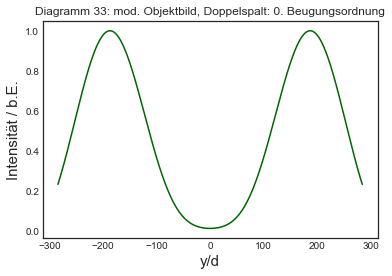

In [27]:
Y = np.linspace(-2,2,10001)*d
#funktion bis k_y aus Praktikumsanleitung integrieren, normieren und plotten
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, 2*np.pi/g)
    f_modifiziert.append(result**2)
C =np.max(f_modifiziert)
f_modifiziert/=C
plt.plot(Y, f_modifiziert,color='darkgreen')
plt.title('Diagramm 33: mod. Objektbild, Doppelspalt: 0. Beugungsordnung',size=12)
plt.xlabel('y/d',size=15)
plt.ylabel('Intensität / b.E.',size=15)
plt.savefig('Diagramme/V233Diagramm33.pdf',format='PDF')
plt.show()
max_mask = np.r_[f_modifiziert[1:] < f_modifiziert[:-1], True] & np.r_[True,f_modifiziert[:-1] < f_modifiziert[1:]];

x1=Y[np.where(max_mask)]
k_y=2*np.pi/g

In [28]:
#k_y stets verkleinern und Maxima zählen. Wenn nur noch ein Maximum da ist, dann k_y ausgeben
while len(x1)>1 :
    k_y=k_y-0.00001
    f_modifiziert=[]
    for i in range(len(Y)):
        y=Y[i]
        result, error = quad(doppelspalt, 0, k_y)
        f_modifiziert.append(result**2)
    C =np.max(f_modifiziert)
    f_modifiziert/=C
    max_mask = np.r_[f_modifiziert[1:] < f_modifiziert[:-1], True] & np.r_[True,f_modifiziert[:-1] < f_modifiziert[1:]];
    x1=Y[np.where(max_mask)]
print(k_y)

0.0125894084545


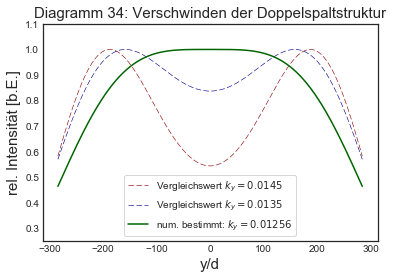

In [30]:
#numerisch berechnet
k_y=0.0125894084545

#Vergleichswerte
k_y2=0.0135
k_y3= 0.0145

Y = np.linspace(-2,2,10001)*d

#für dieses k_y und zwei Vergleichswerte das Objektbild plotten
f_modifiziert=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y)
    f_modifiziert.append(result**2)
C =np.max(f_modifiziert)
f_modifiziert/=C

f_modifiziert2=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y2)
    f_modifiziert2.append(result**2)
C =np.max(f_modifiziert2)
f_modifiziert2/=C

f_modifiziert3=[]
for i in range(len(Y)):
    y=Y[i]
    result, error = quad(doppelspalt, 0, k_y3)
    f_modifiziert3.append(result**2)
C =np.max(f_modifiziert3)
f_modifiziert3/=C

plt.plot(Y, f_modifiziert3,color='darkred',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=0.0145$')
plt.plot(Y, f_modifiziert2,color='darkblue',linestyle='--',linewidth=0.6,label=r'Vergleichswert $k_y=0.0135$')
plt.plot(Y, f_modifiziert,color='darkgreen',label=r'num. bestimmt: $k_y=0.01256$')
plt.title('Diagramm 34: Verschwinden der Doppelspaltstruktur',size=15)
plt.xlabel('y/d',size=15)
plt.ylabel('rel. Intensität [b.E.]', size=15)
plt.ylim(0.25,1.1)
plt.legend(frameon=True)
plt.savefig('Diagramme/V233Diagramm34.pdf',format='PDF')
plt.show()